# Лабораториска Вежба 2
# Линеарна Регресија
Мартин Поповски 186086

## Imports

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge

## Load dataset 

In [3]:
df = pd.read_csv('data/California Housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800


## Analyze dataset

In [3]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

No missing values

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualizations

### Pairplots

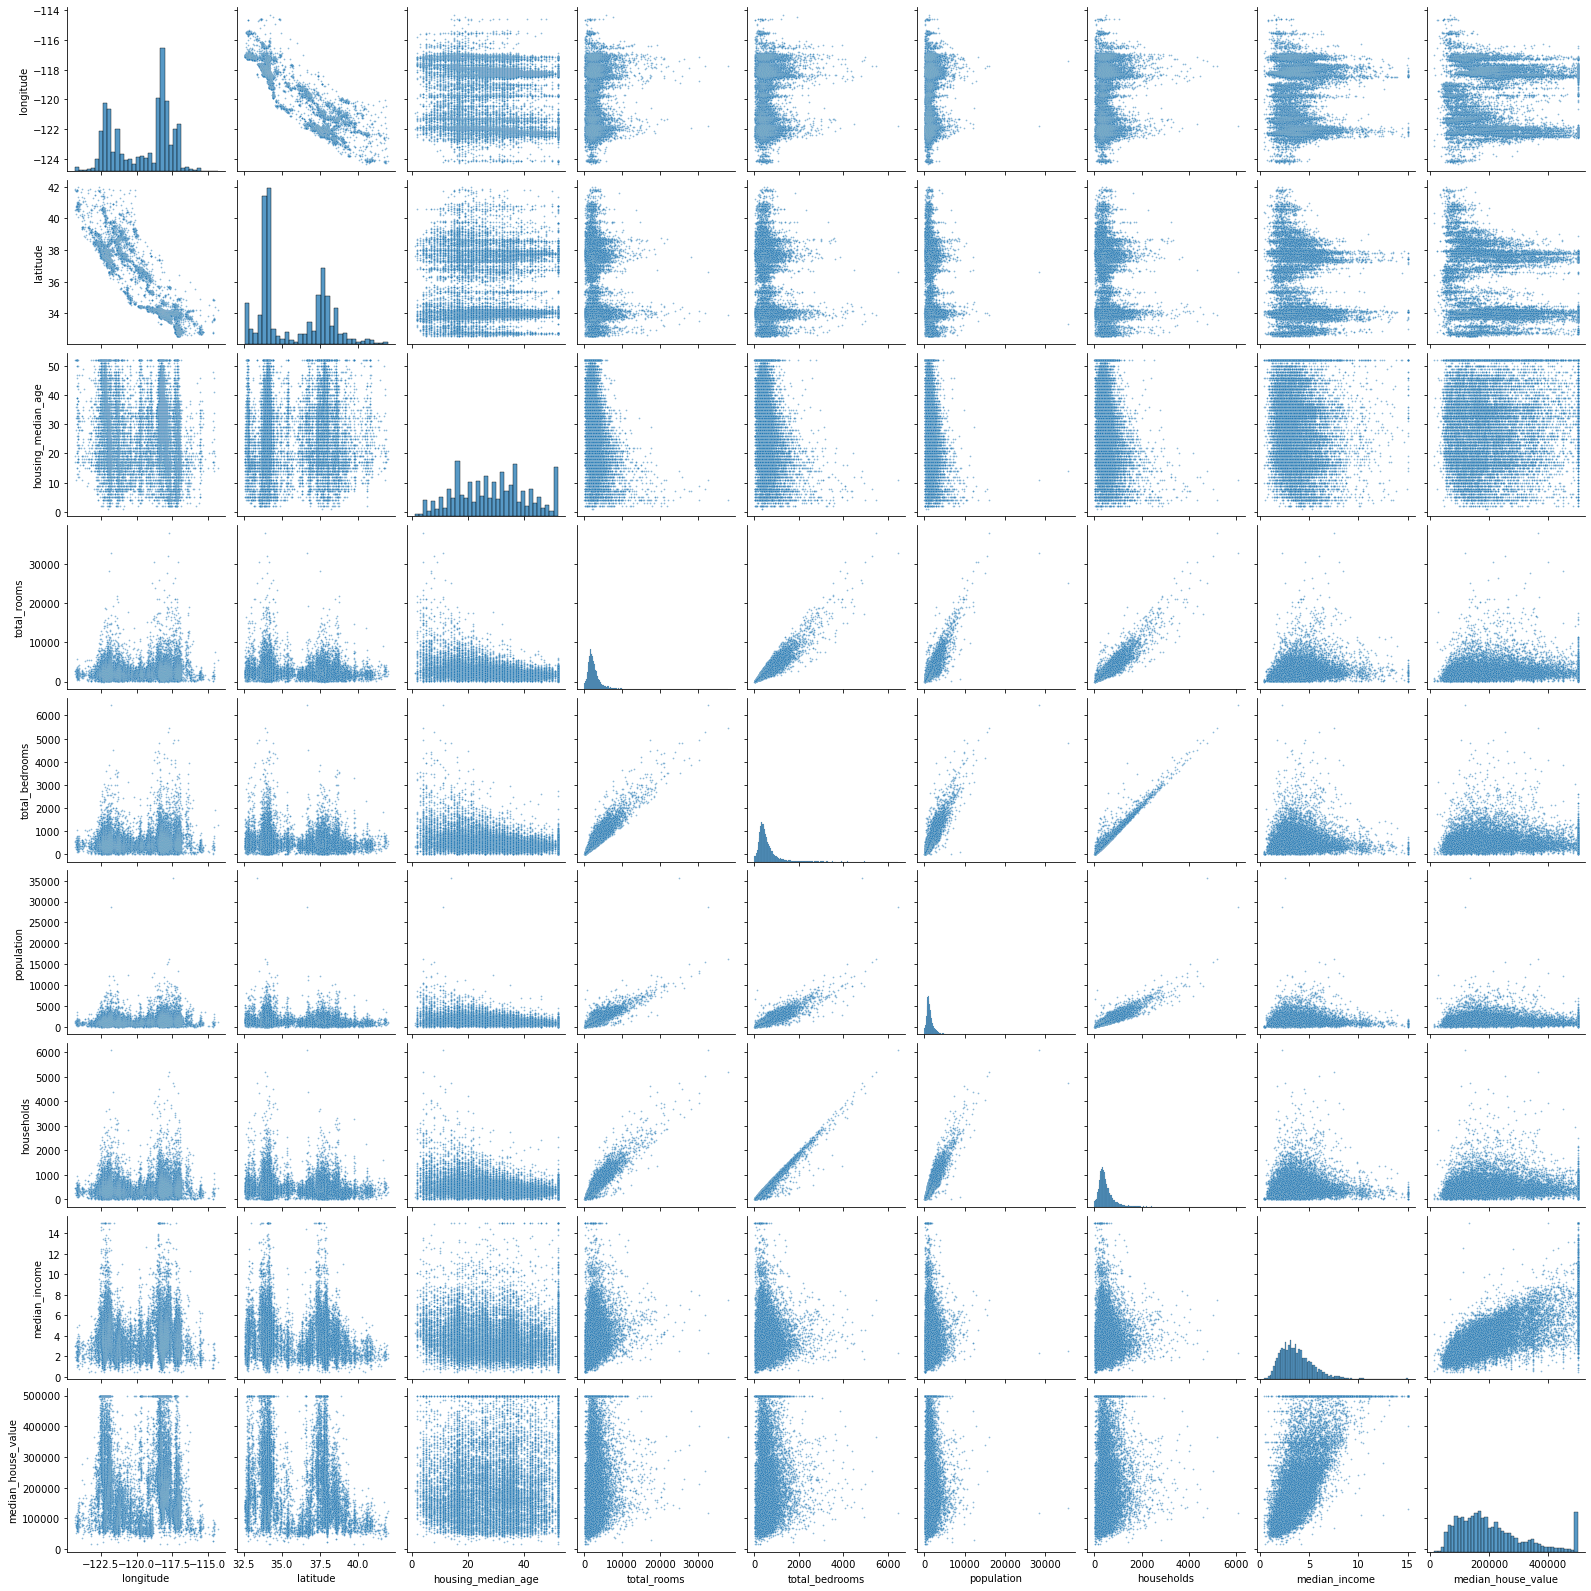

In [5]:
sns.pairplot(data=df, plot_kws={'s': 3, 'alpha': 0.5})

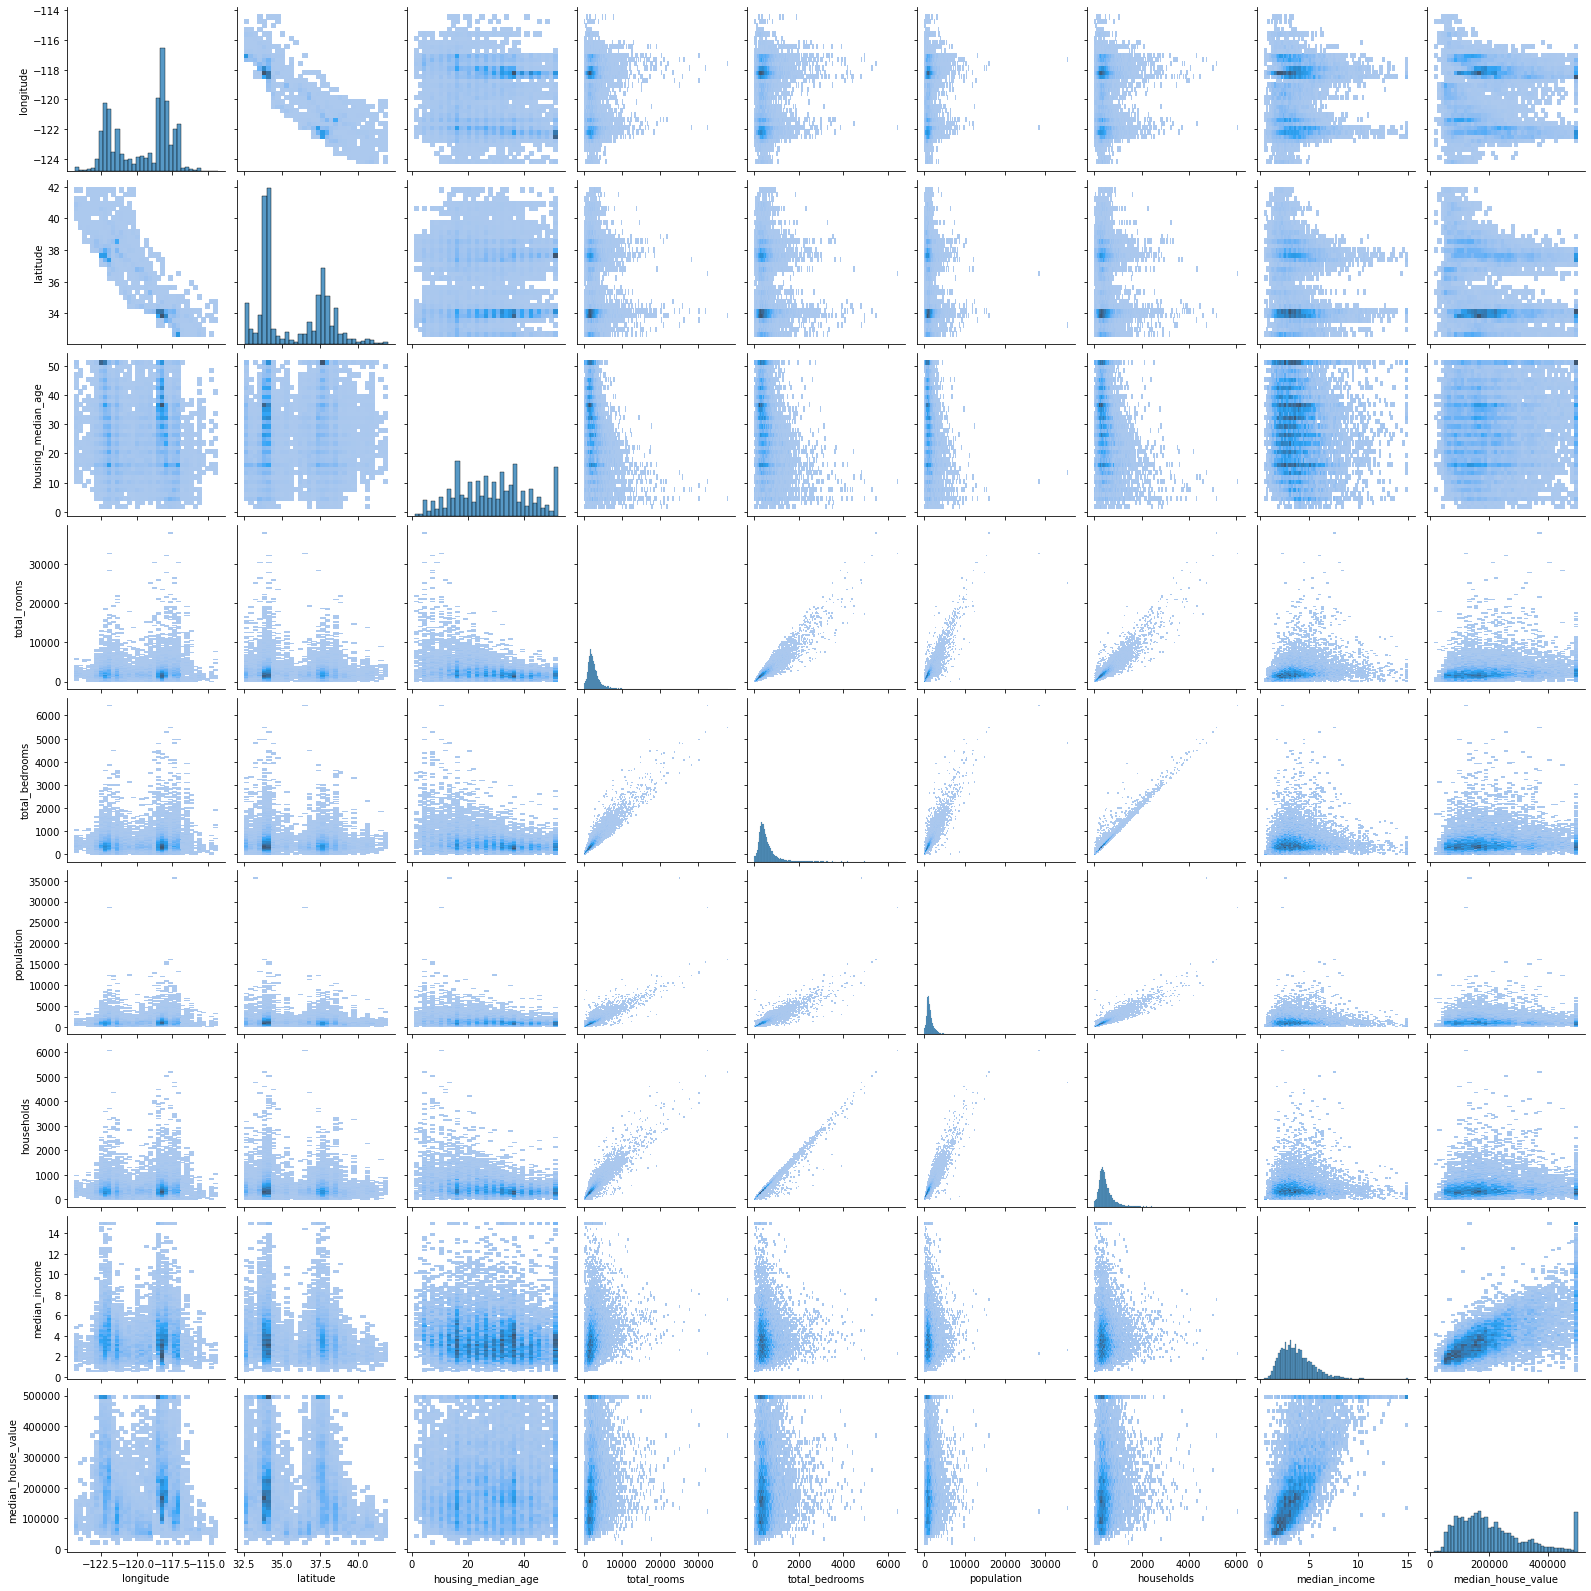

In [6]:
sns.pairplot(data=df, kind='hist')

### Correlation

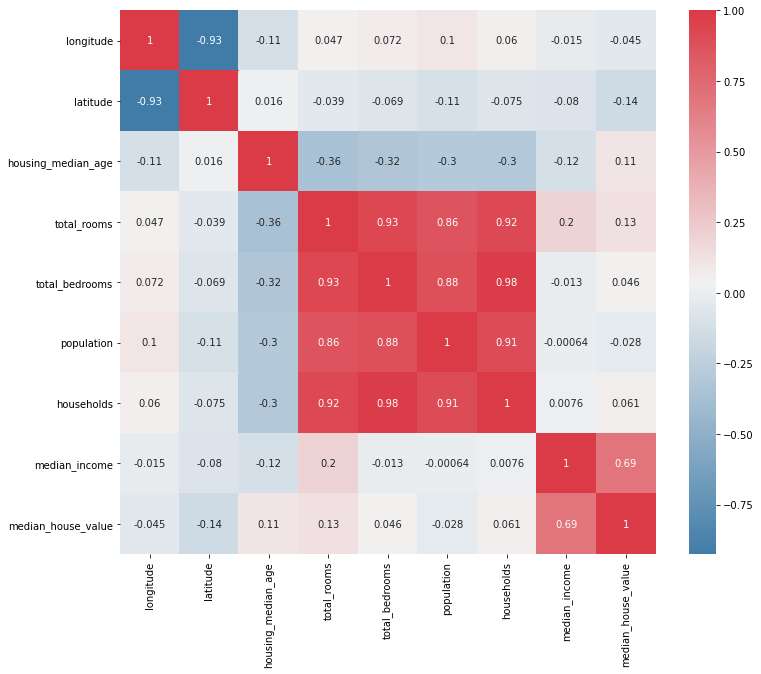

In [7]:
corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap = True), ax=ax)
_ = plt.yticks(rotation=0)

### Individual linear regressions with target variable

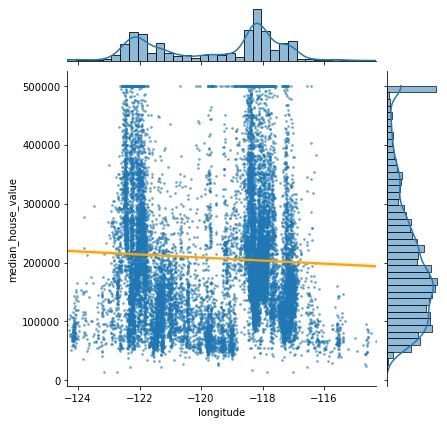

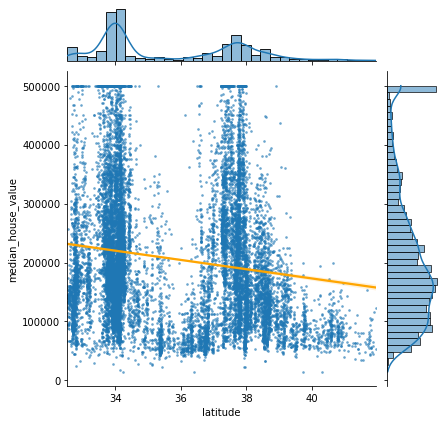

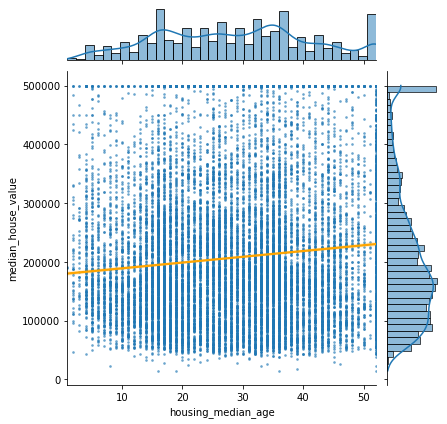

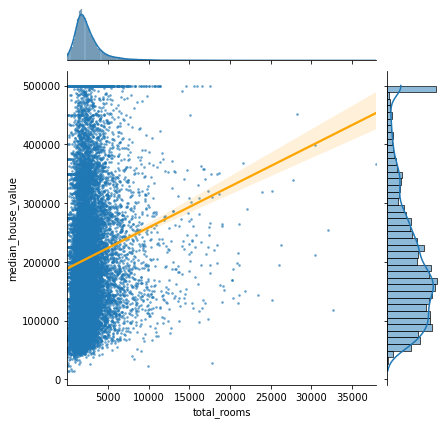

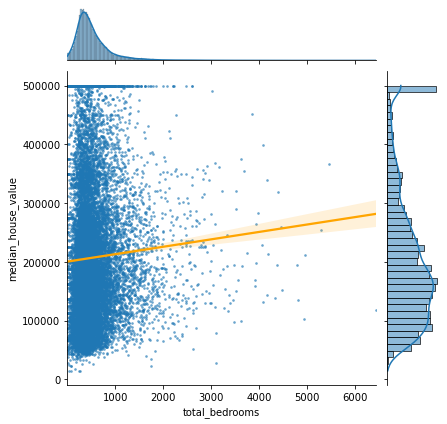

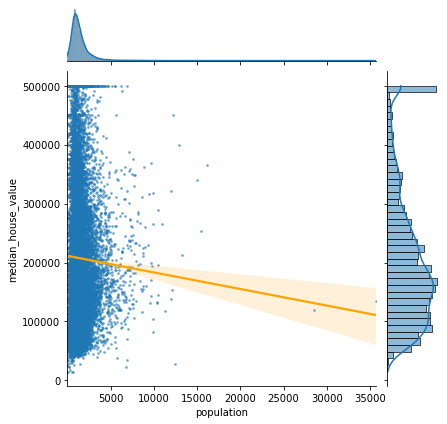

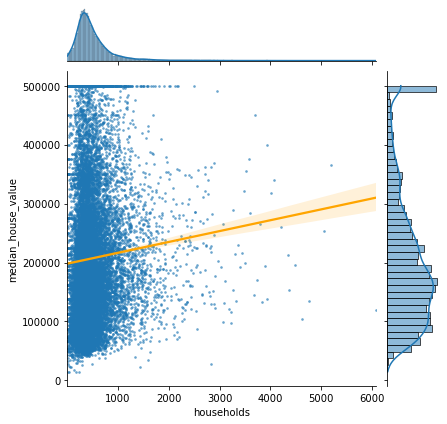

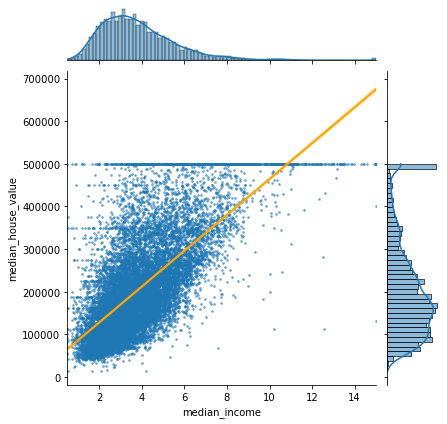

In [8]:
for x_column in df.columns:
    if x_column != 'median_house_value':
        sns.jointplot(x=x_column, y='median_house_value', data=df, kind='reg', scatter_kws={'s': 3, 'alpha': 0.5}, line_kws={'color': 'orange'})

## Preprocessing

In [9]:
X = df.drop(['median_house_value'], axis=1).copy()
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15,5612,1283,1015,472,1.4936
1,-114.47,34.40,19,7650,1901,1129,463,1.8200
2,-114.56,33.69,17,720,174,333,117,1.6509
3,-114.57,33.64,14,1501,337,515,226,3.1917
4,-114.57,33.57,20,1454,326,624,262,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571
16996,-124.27,40.69,36,2349,528,1194,465,2.5179
16997,-124.30,41.84,17,2677,531,1244,456,3.0313
16998,-124.30,41.80,19,2672,552,1298,478,1.9797


In [10]:
y = df['median_house_value']
y

0         66900
1         80100
2         85700
3         73400
4         65500
          ...  
16995    111400
16996     79000
16997    103600
16998     85800
16999     94600
Name: median_house_value, Length: 17000, dtype: int64

### Normalize data

In [11]:
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281
...,...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.058389,0.060987,0.025337,0.060516,0.128081
16996,0.007968,0.866100,0.686275,0.061869,0.081782,0.033381,0.076303,0.139170
16997,0.004980,0.988310,0.313725,0.070515,0.082247,0.034782,0.074823,0.174577
16998,0.004980,0.984060,0.352941,0.070384,0.085506,0.036296,0.078441,0.102054


### Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Model

In [13]:
df_mse = pd.DataFrame()
df_mse['Model'] = []
df_mse['MSE'] = []

### Helper functions

In [14]:
def fit_summary(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print(f'Coefficients W: {model.coef_}')
    print(f'Intercept W0: {model.intercept_}')
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE: {mse}')
    
    plt.figure()
    plt.plot(np.arange(len(model.coef_)), model.coef_, ".",  markersize=15, color = "darkgreen")
    plt.xlabel("Feature number")
    plt.ylabel("Coefficients w")
    plt.title("Coefficient Weights")
    plt.show()
    return mse

In [15]:
def plot_residuals(model, X_test, y_test):
    y_pred = model.predict(X_test)
    residual = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residual)
    plt.axhline(0, c='black', linestyle=':')
    plt.title('Residuals')
    for x_predict, y_residual in zip(y_pred, residual):
        plt.plot([x_predict, x_predict], [0, y_residual], c='red', lw=1, alpha=0.8)

### sklearn LinearRegression

Coefficients W: [ -431644.42440198  -402420.41864719    59879.3490035   -319794.32071166
   766380.61025084 -1278786.90022239   234992.86189285   587170.63125299]
Intercept W0: 365674.9003765645
MSE: 4768968118.489042


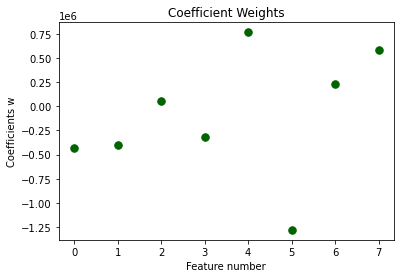

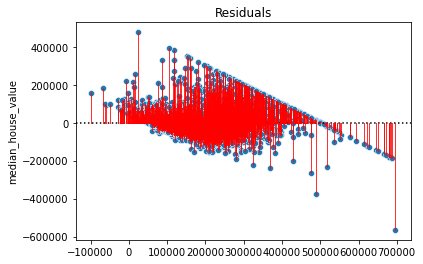

In [16]:
model = LinearRegression()
mse = fit_summary(model, X_train, X_test, y_train, y_test)
df_mse = df_mse.append({'Model': 'Linear regression sklearn', 'MSE': mse}, ignore_index=True)
plot_residuals(model, X_test, y_test)

### Statsmodels linear regression

In [17]:
regressor = sm.OLS(y, X).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          1.939e+04
Date:                Mon, 10 May 2021   Prob (F-statistic):                        0.00
Time:                        23:34:58   Log-Likelihood:                     -2.1487e+05
No. Observations:               17000   AIC:                                  4.298e+05
Df Residuals:                   16992   BIC:                                  4.298e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude          -4.949e+04   2801.556    -17.665      0.000    -5.5e+04    -4.4e+04
latitude           -6.691e+04   2631.883    -25.422      0.000   -7.21e+04   -6.17e+04
housing_median_age  1.172e+05   2300.031     50.971      0.000    1.13e+05    1.22e+05
total_rooms        -7.625e+05   3.39e+04    -22.486      0.000   -8.29e+05   -6.96e+05
total_bedrooms      8.052e+05   5.32e+04     15.132      0.000    7.01e+05     9.1e+05
population         -1.215e+06   4.53e+04    -26.806      0.000    -1.3e+06   -1.13e+06
households           6.54e+05   5.46e+04     11.976      0.000    5.47e+05    7.61e+05
median_income         7.2e+05   5017.047    143.508      0.000     7.1e+05     7.3e+05
==============================================================================
Omnibus:                     3200.231   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12448.937
Skew:                           0.900   Prob(JB):                         0.00
Kurtosis:                       6.786   Cond. No.                         115.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 5540336941.932771


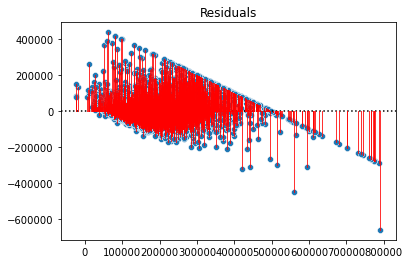

In [18]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
df_mse = df_mse.append({'Model': 'Linear regression statsmodels', 'MSE': mse}, ignore_index=True)
plot_residuals(regressor, X_test, y_test)

### Ridge regression

Coefficients W: [-388809.39723241 -362136.47107251   63934.73072466  -78758.20137255
  269983.33541777 -398812.24889425  114251.100185    558847.28299402]
Intercept W0: 335795.9702051828
MSE: 5087783667.195672


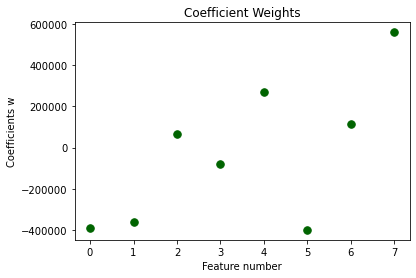

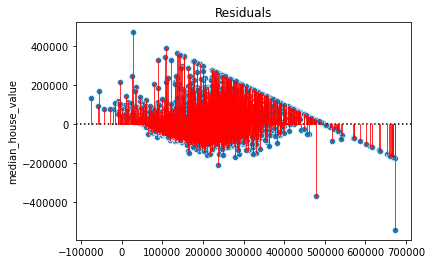

In [19]:
model = Ridge(alpha=5)
mse = fit_summary(model, X_train, X_test, y_train, y_test)
df_mse = df_mse.append({'Model': 'Ridge regression', 'MSE': mse}, ignore_index=True)
plot_residuals(model, X_test, y_test)

### Lasso regression

Coefficients W: [ -431667.09532141  -402447.0320829     59907.42046406  -314581.51021301
   763373.86459212 -1272739.56639668   230562.35904285   586676.51093912]
Intercept W0: 365804.24501411035
MSE: 4769769621.827532


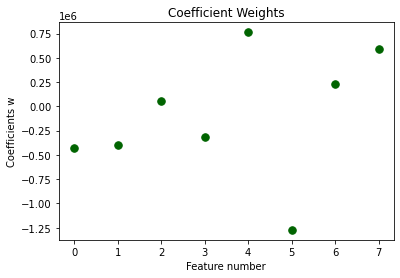

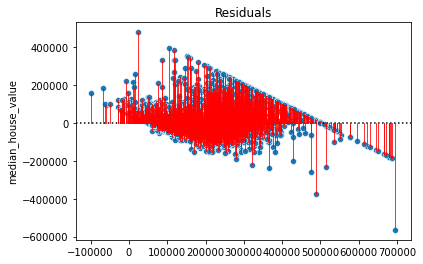

In [20]:
model = Lasso(alpha=1)
mse = fit_summary(model, X_train, X_test, y_train, y_test)
df_mse = df_mse.append({'Model': 'Lasso regression', 'MSE': mse}, ignore_index=True)
plot_residuals(model, X_test, y_test)

### ElasticNet regression

Coefficients W: [-1773.20310482 -5063.76016358  3923.09821312  1222.8968286
   468.46046887  -163.40448705   601.03406909 14951.63194687]
Intercept W0: 204643.98366889425
MSE: 12872280807.405016


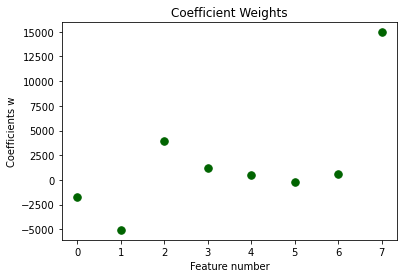

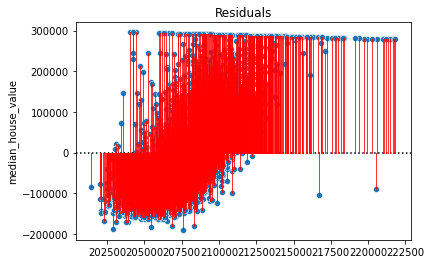

In [21]:
model = ElasticNet(alpha=1, l1_ratio = 0.3)
mse = fit_summary(model, X_train, X_test, y_train, y_test)
df_mse = df_mse.append({'Model': 'ElasticNet regression', 'MSE': mse}, ignore_index=True)
plot_residuals(model, X_test, y_test)

### BayesianRidge regression

Coefficients W: [ -431557.31701992  -402318.9301953     59895.8406965   -317995.508976
   762569.64728947 -1271907.82246299   234054.12013736   586985.76747576]
Intercept W0: 365628.8285933564
MSE: 4769795953.655131


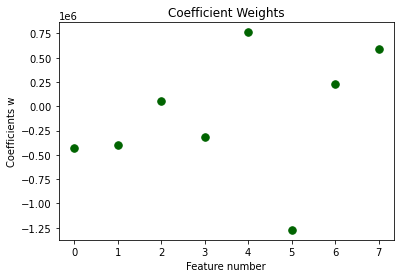

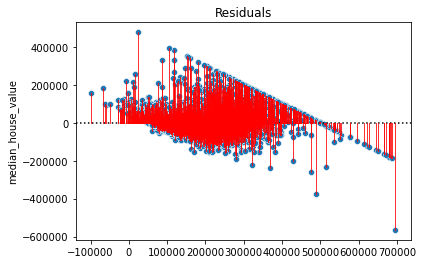

In [22]:
model = BayesianRidge()
mse = fit_summary(model, X_train, X_test, y_train, y_test)
df_mse = df_mse.append({'Model': 'Bayesian regression', 'MSE': mse}, ignore_index=True)
plot_residuals(model, X_test, y_test)

## Conclusion

In [23]:
df_mse['MSE_str'] = df_mse['MSE'].apply(lambda x: '%.f' % x)

In [24]:
df_mse

,Model,MSE,MSE_str
0,Linear regression sklearn,4.768968e+09,4768968118
1,Linear regression statsmodels,5.540337e+09,5540336942
2,Ridge regression,5.087784e+09,5087783667
3,Lasso regression,4.769770e+09,4769769622
4,ElasticNet regression,1.287228e+10,12872280807
5,Bayesian regression,4.769796e+09,4769795954


<AxesSubplot:xlabel='Model', ylabel='MSE'>

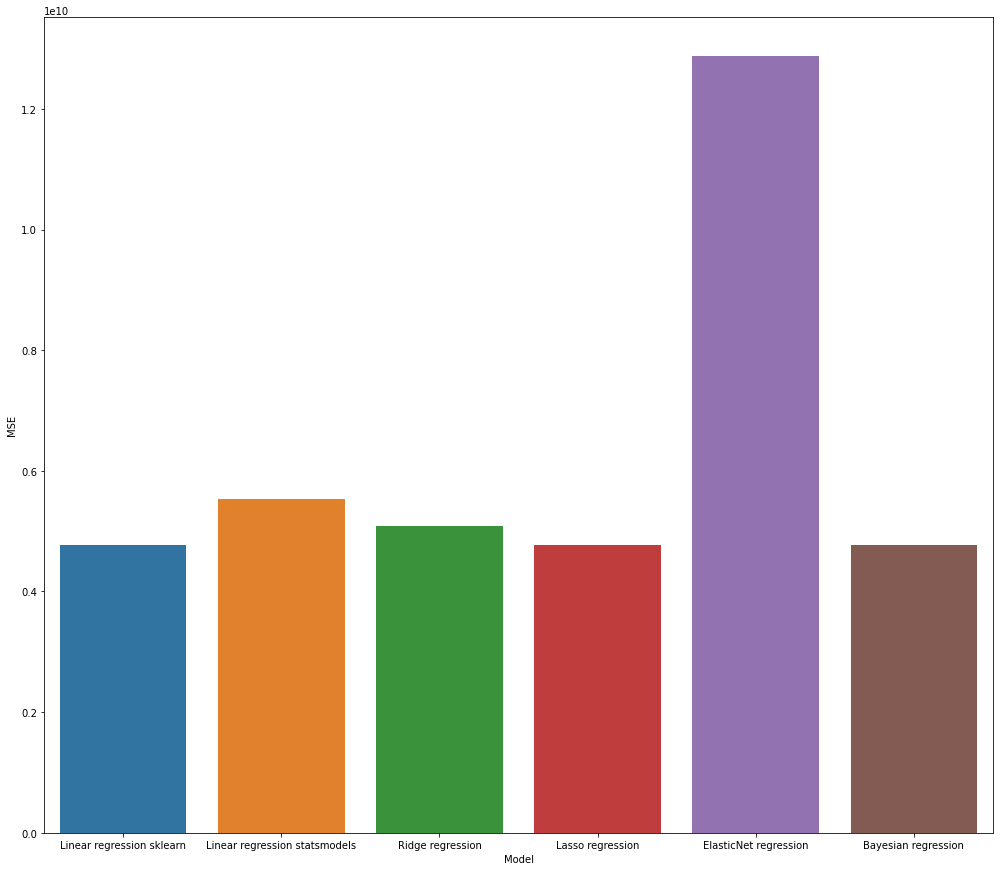

In [33]:
fig, ax = plt.subplots(figsize=(17, 15))
sns.barplot(x='Model', y='MSE', data=df_mse, ax=ax)

Most models show a similar MSE appart from ElasticNet regression which shows a higher error than the rest